100%|██████████| 170498071/170498071 [00:02<00:00, 63942074.26it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


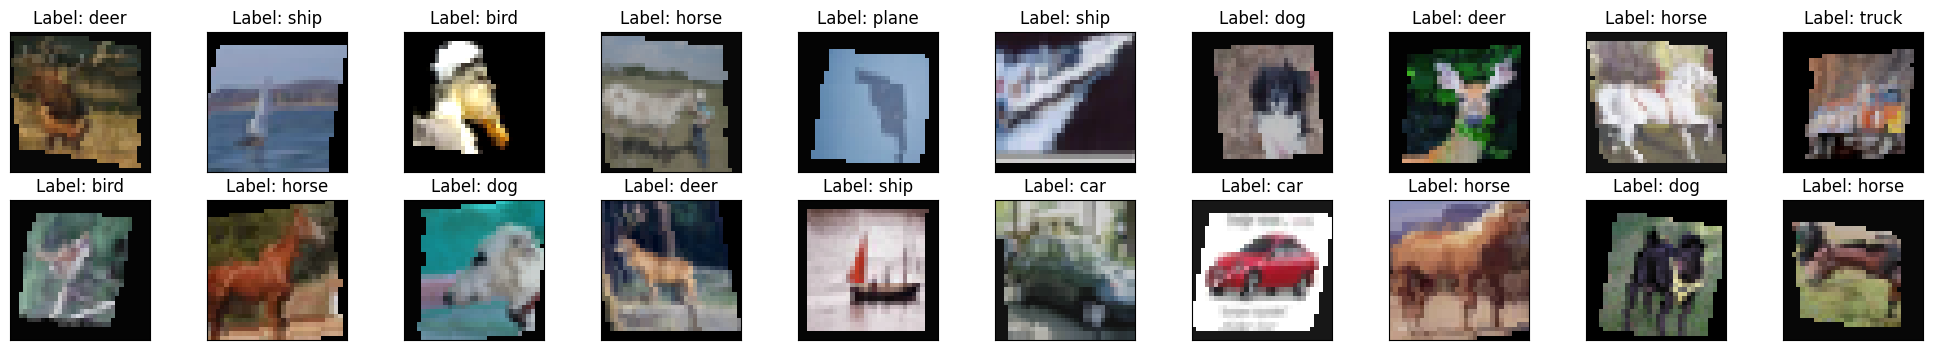

Epoch 1:
Train Loss: 1.6501, Train Accuracy: 0.3895
Test Loss: 1.2759, Test Accuracy: 0.5435
Epoch 5:
Train Loss: 1.0615, Train Accuracy: 0.6260
Test Loss: 0.8669, Test Accuracy: 0.6882
Epoch 10:
Train Loss: 0.8524, Train Accuracy: 0.7035
Test Loss: 0.6694, Test Accuracy: 0.7660
Epoch 15:
Train Loss: 0.7427, Train Accuracy: 0.7416
Test Loss: 0.6021, Test Accuracy: 0.7906
Epoch 20:
Train Loss: 0.6759, Train Accuracy: 0.7647
Test Loss: 0.5680, Test Accuracy: 0.8029


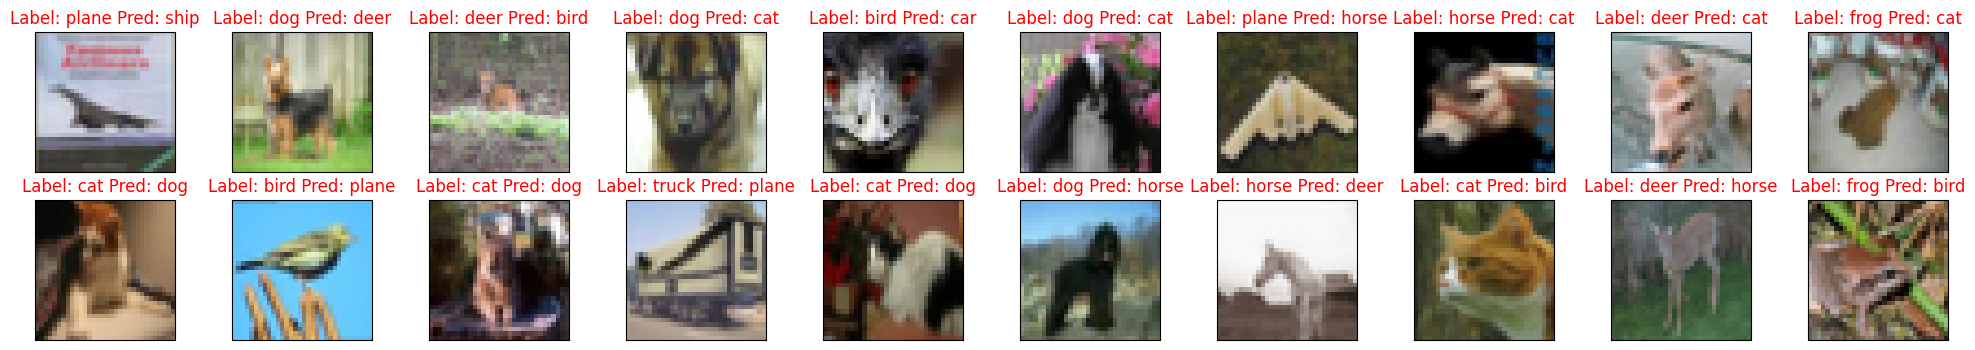

Epoch 25:
Train Loss: 0.6289, Train Accuracy: 0.7812
Test Loss: 0.4933, Test Accuracy: 0.8308
Epoch 30:
Train Loss: 0.5959, Train Accuracy: 0.7927
Test Loss: 0.5049, Test Accuracy: 0.8227
Epoch 35:
Train Loss: 0.5811, Train Accuracy: 0.7987
Test Loss: 0.4935, Test Accuracy: 0.8289
Epoch 40:
Train Loss: 0.5574, Train Accuracy: 0.8062
Test Loss: 0.4863, Test Accuracy: 0.8314


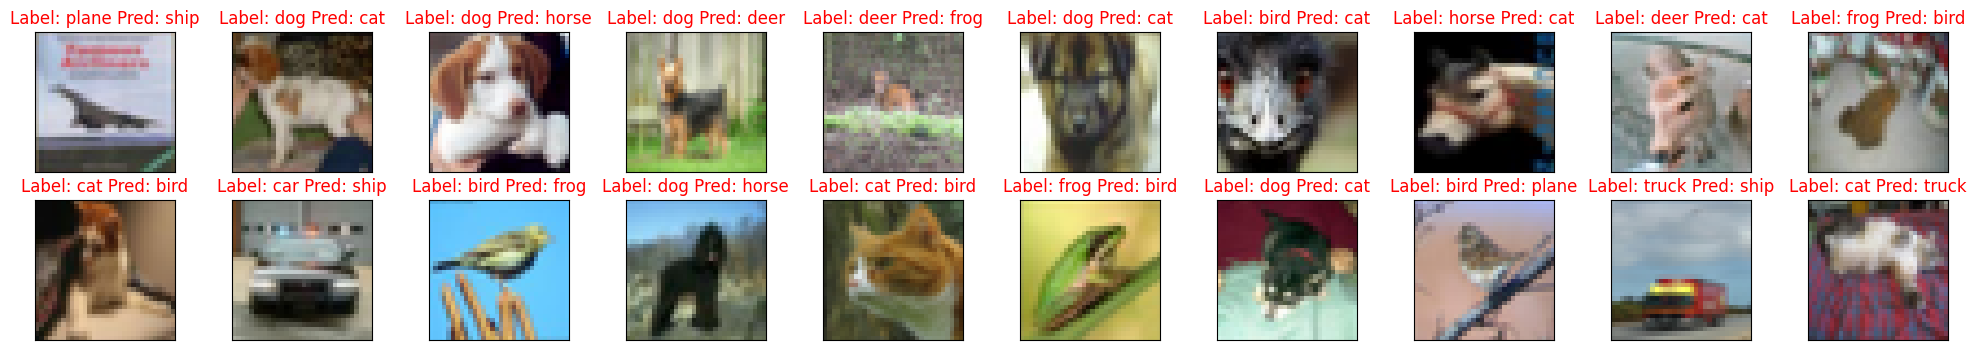

Epoch 45:
Train Loss: 0.5475, Train Accuracy: 0.8108
Test Loss: 0.4749, Test Accuracy: 0.8370
Epoch 50:
Train Loss: 0.5276, Train Accuracy: 0.8167
Test Loss: 0.4689, Test Accuracy: 0.8390
Epoch 55:
Train Loss: 0.5178, Train Accuracy: 0.8218
Test Loss: 0.4723, Test Accuracy: 0.8405
Epoch 60:
Train Loss: 0.5118, Train Accuracy: 0.8229
Test Loss: 0.4741, Test Accuracy: 0.8381


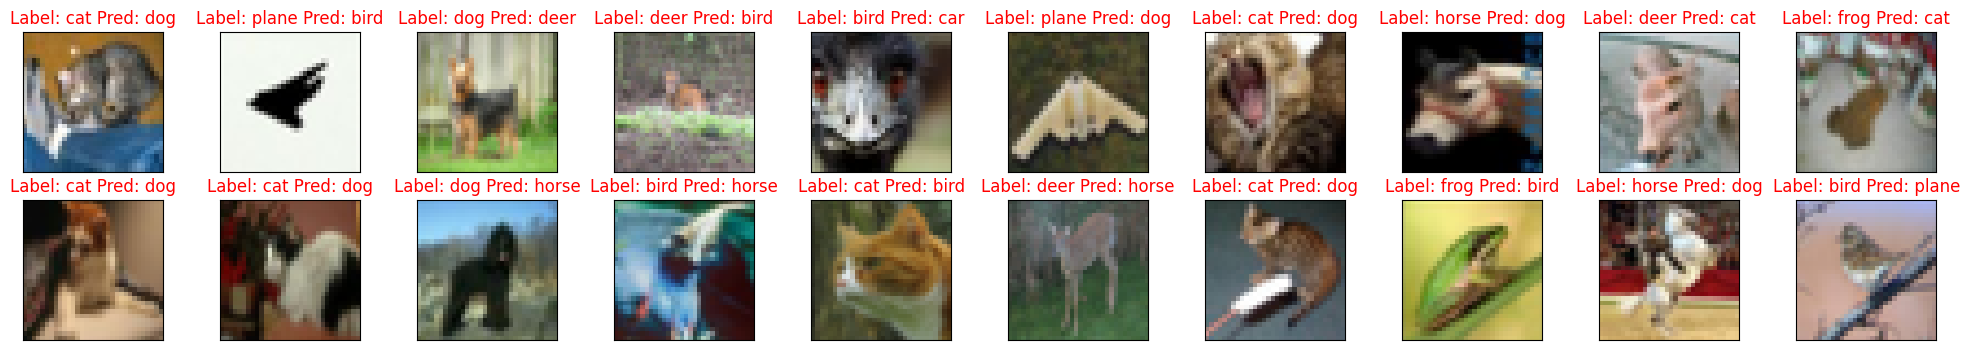

Epoch 65:
Train Loss: 0.5074, Train Accuracy: 0.8265
Test Loss: 0.4386, Test Accuracy: 0.8488
Epoch 70:
Train Loss: 0.4952, Train Accuracy: 0.8289
Test Loss: 0.4207, Test Accuracy: 0.8495
Epoch 75:
Train Loss: 0.4927, Train Accuracy: 0.8304
Test Loss: 0.4317, Test Accuracy: 0.8521
Epoch 80:
Train Loss: 0.4894, Train Accuracy: 0.8307
Test Loss: 0.4259, Test Accuracy: 0.8568


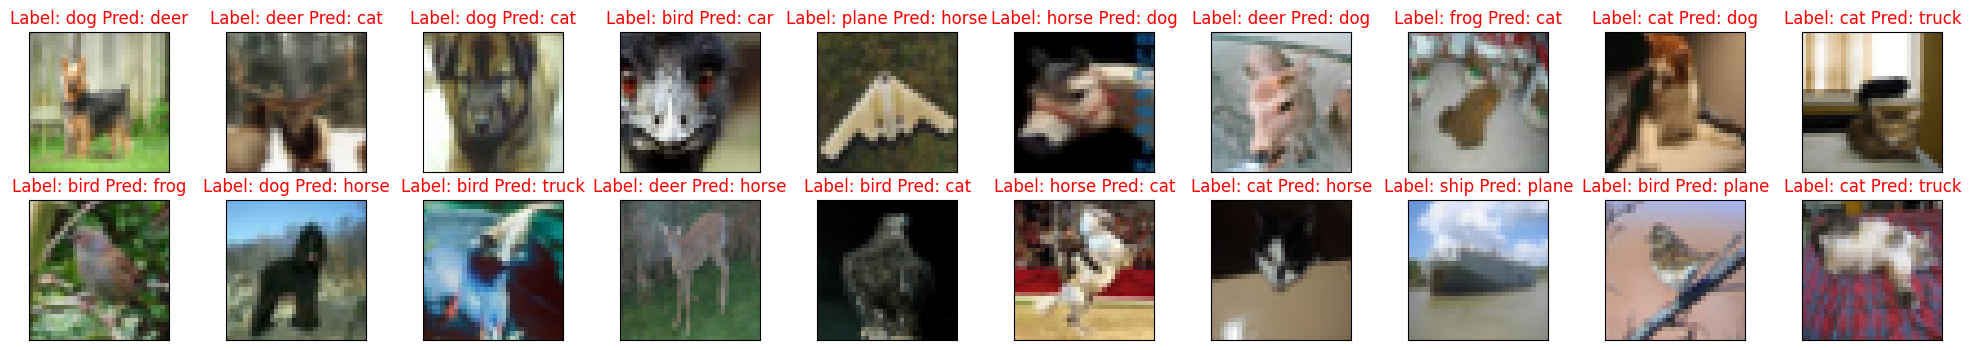

Epoch 85:
Train Loss: 0.4797, Train Accuracy: 0.8340
Test Loss: 0.4193, Test Accuracy: 0.8551
Epoch 90:
Train Loss: 0.4691, Train Accuracy: 0.8358
Test Loss: 0.4613, Test Accuracy: 0.8454
Epoch 95:
Train Loss: 0.4729, Train Accuracy: 0.8364
Test Loss: 0.4202, Test Accuracy: 0.8583
Epoch 100:
Train Loss: 0.4715, Train Accuracy: 0.8372
Test Loss: 0.4417, Test Accuracy: 0.8489


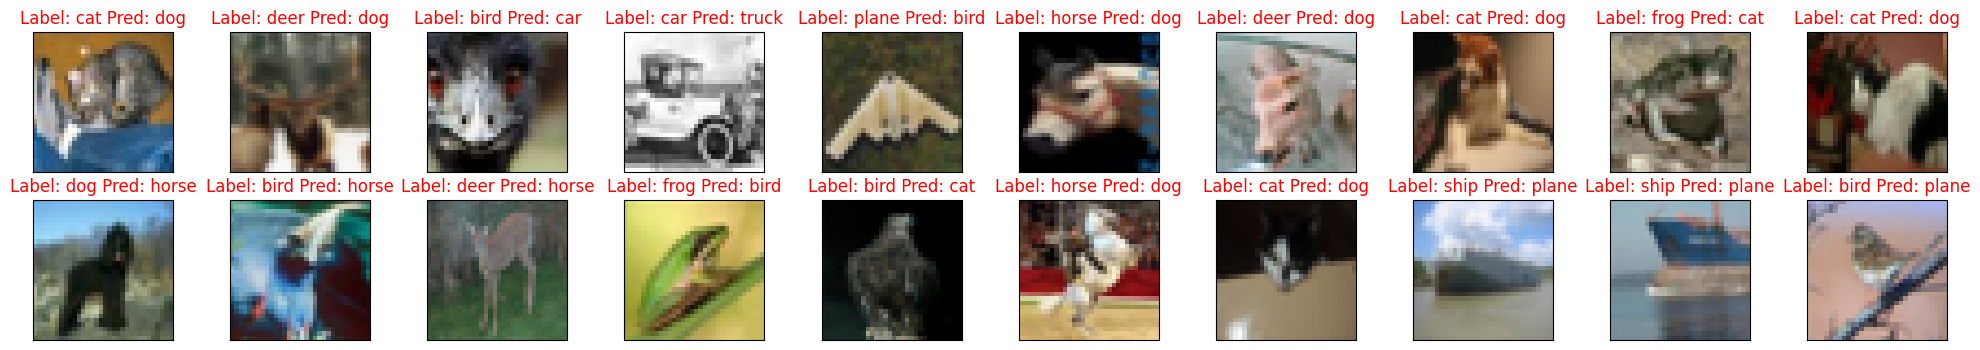

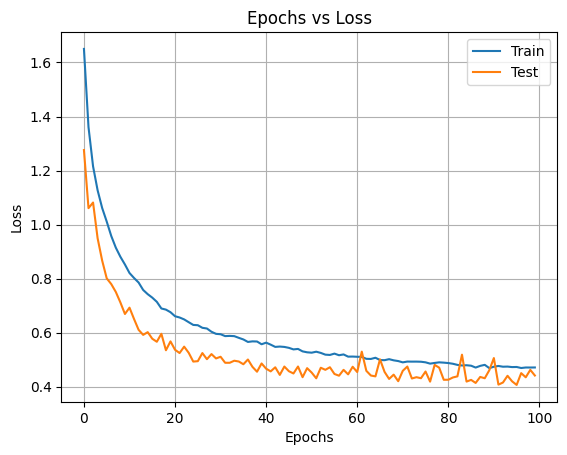

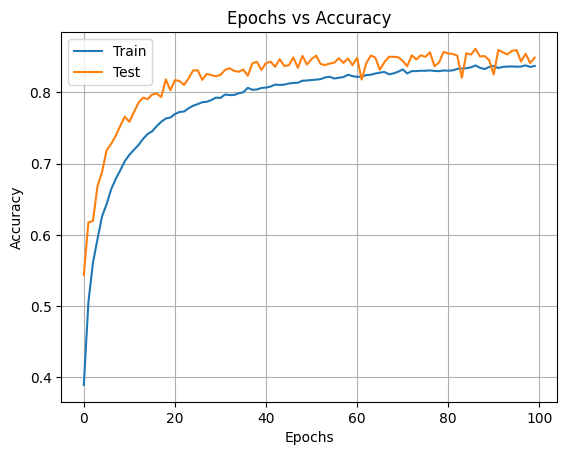

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random

def set_seed(seed):
    """
    Set the random seed for reproducibility.
    """
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(7777)

# Check if GPU is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Enhanced data augmentation for training data
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # Randomly crop the image with padding
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(10),  # Randomly rotate the image
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),  # Apply random affine transformations
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Randomly change brightness, contrast, and saturation
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize([0.5], [0.5])  # Normalize the image
])

# Transform for test data
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize the image
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize([0.5], [0.5])  # Normalize the image
])

# Load and transform the CIFAR10 training dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

# Load and transform the CIFAR10 test dataset
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

# Class labels for CIFAR10
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def show_images(images, labels, predictions=None, color=None):
    """
    Display a batch of images with their labels and predictions.
    """
    fig = plt.figure(figsize=(25, 4))
    for idx, (img, label) in enumerate(zip(images, labels)):
        ax = fig.add_subplot(2, 10, idx + 1, xticks=[], yticks=[])
        plt.imshow(img.transpose(1, 2, 0))
        title = f'Label: {classes[label.item()]}'
        if predictions is not None:
            title += f' Pred: {classes[predictions[idx].item()]}'
        ax.set_title(title, color=color if color else 'black')
    plt.show()

def unnormalize(img, mean, std):
    """
    Unnormalize an image.
    """
    return img.detach().cpu().numpy() * std + mean

def plot_curves(train_data, test_data, xlabel, ylabel, title):
    """
    Plot training and test curves.
    """
    plt.figure()
    plt.plot(train_data, label='Train')
    plt.plot(test_data, label='Test')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()
    
# Display a batch of unnormalized images
data_iter = iter(train_loader)
images, labels = next(data_iter)
unnormalized_images = [unnormalize(img, 0.5, 0.5) for img in images]
show_images(unnormalized_images[:20], labels[:20])

class LeNet(nn.Module):
    """
    Define the LeNet neural network model.
    """
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.maxpool2d = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(256*2*2, 512)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        """
        Forward pass through the network.
        """
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool2d(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.maxpool2d(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.maxpool2d(x)
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.maxpool2d(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x

model = LeNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

epochs = 100
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []

best_accuracy = 0.0
for epoch in range(1, epochs + 1):
    train_loss, train_corrects = 0.0, 0.0
    test_loss, test_corrects = 0.0, 0.0

    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        train_corrects += (preds == labels).sum().item()

    model.eval()
    incorrect_images, incorrect_preds, correct_labels = [], [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            test_corrects += (preds == labels).sum().item()

            # Collect incorrectly predicted images
            incorrect_images.extend(images[preds != labels])
            incorrect_preds.extend(preds[preds != labels])
            correct_labels.extend(labels[preds != labels])

    # Unnormalize incorrectly predicted images
    unnormalized_incorrect_images = [unnormalize(img, 0.5, 0.5) for img in incorrect_images]

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_corrects / len(train_loader.dataset))
    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(test_corrects / len(test_loader.dataset))

    if test_accuracies[-1] > best_accuracy:
        best_accuracy = test_accuracies[-1]
        torch.save(model.state_dict(), 'best_model.pth')
    
    if epoch == 1 or epoch % 5 == 0:
        print(f"Epoch {epoch}:")
        print(f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}")
        print(f"Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}")

    if epoch % 20 == 0:
        show_images(unnormalized_incorrect_images[:20], correct_labels[:20], incorrect_preds[:20], color='red')

plot_curves(train_losses, test_losses, 'Epochs', 'Loss', 'Epochs vs Loss')
plot_curves(train_accuracies, test_accuracies, 'Epochs', 'Accuracy', 'Epochs vs Accuracy')